In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 110
epochs = 100
#------------------------------
#read kaggle facial expression recognition challenge dataset (fer2013.csv)
#https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

with open("/content/drive/My Drive/Colab Notebooks/fer2013/fer2013.csv") as f:
  content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

#------------------------------
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
      print("", end="")

#------------------------------
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#------------------------------
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
#------------------------------
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

#------------------------------

fit = True

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
	model.load_weights('/data/facial_expression_model_weights.h5') #load weights
	
#------------------------------
"""
#overall evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])
"""
#------------------------------
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
#------------------------------








number of instances:  35888
instance length:  2304
28709 train samples
3589 test samples
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
110/110 [==============================] - 1s 10ms/step - loss: 1.8234 - accuracy: 0.2467
Epoch 2/100
110/110 [==============================] - 1s 10ms/step - loss: 1.8107 - accuracy: 0.2538
Epoch 3/100
110/110 [==============================] - 1s 9ms/step - loss: 1.8050 - accuracy: 0.2513
Epoch 4/100
110/110 [==============================] - 1s 9ms/step - loss: 1.7822 - accuracy: 0.2526
Epoch 5/100
110/110 [==============================] - 1s 10ms/step - loss: 1.7193 - accuracy: 0.2911
Epoch 6/100
110/110 [==============================] - 1s 10ms/step - loss: 1.6592 - accuracy: 0.3346
Epoch 7/100
110/110 [==============================] - 1s 9ms/step - loss: 1.6067 - accuracy: 0.3600
Epoch 8/100
110/110 [==============================] - 1s 9ms/step - loss: 1.5466 - accuracy: 0.3892
Epoch 9/100
110/110 [==

In [3]:
#Saving the model
model.save('model25.h5')

In [4]:
#Evaluation
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.2660622298717499
Train accuracy: 90.83911180496216
Test loss: 2.1956183910369873
Test accuracy: 55.83727955818176


In [7]:
#Confusion Matrix.

from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = [];
 
for i in predictions:
 
  pred_list.append(np.argmax(i))
 
for i in y_test:
 
  actual_list.append(np.argmax(i))
 
confusion_matrix(actual_list, pred_list)

array([[208,   8,  63,  36,  67,  12,  73],
       [ 15,  23,   5,   3,   2,   1,   7],
       [ 56,   3, 202,  33,  91,  44,  67],
       [ 29,   2,  36, 696,  37,  26,  69],
       [ 88,   6,  84,  64, 274,  11, 126],
       [ 13,   0,  59,  20,  14, 294,  15],
       [ 49,   4,  58,  58, 115,  16, 307]])

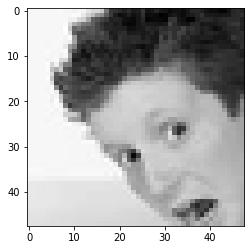

[7.3727483e-06 6.2037799e-11 1.1966479e-03 6.2708184e-04 4.9368746e-04
 2.1820462e-08 9.9767524e-01]


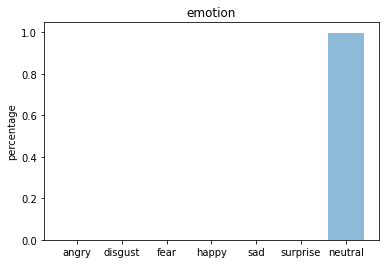

----------------------------------------------


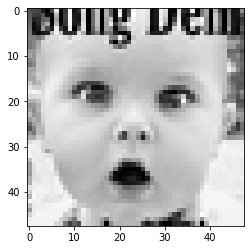

[3.4392056e-07 3.3293916e-13 4.8443367e-04 1.6145987e-07 4.3570100e-07
 9.9948442e-01 3.0186691e-05]


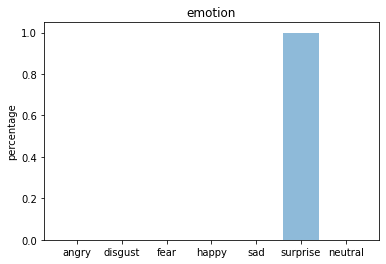

----------------------------------------------


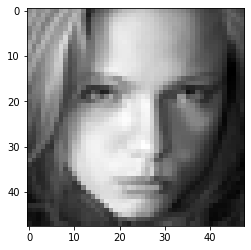

[3.4444157e-02 1.3261758e-06 1.3199132e-03 7.0790487e-04 4.0877055e-02
 9.9718243e-09 9.2264968e-01]


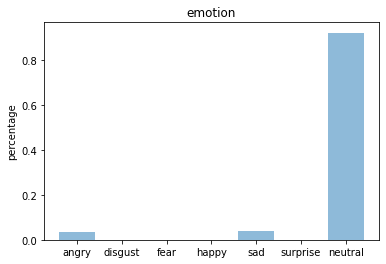

----------------------------------------------


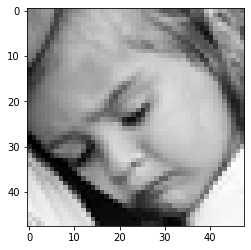

[1.2253992e-04 7.2908337e-09 6.8270296e-02 5.0380242e-01 4.1096160e-01
 6.5860956e-04 1.6184544e-02]


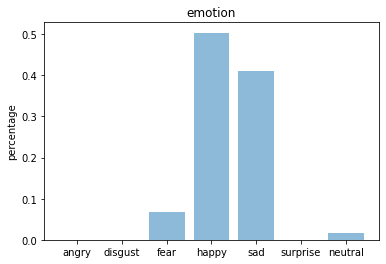

----------------------------------------------


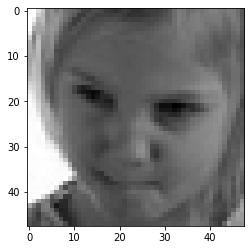

[9.9410993e-01 3.6193014e-04 4.0334775e-03 5.0980446e-04 9.2287164e-04
 6.3998218e-06 5.5563469e-05]


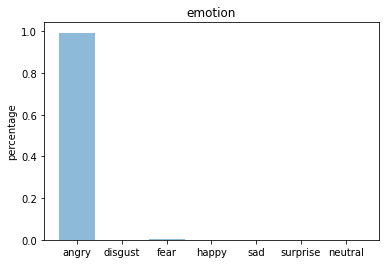

----------------------------------------------


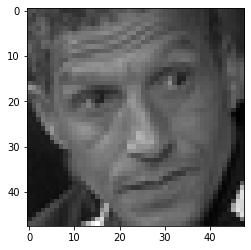

[1.6138760e-02 6.5441505e-04 1.3368998e-01 1.7854456e-02 9.1028854e-02
 6.8093300e-01 5.9700504e-02]


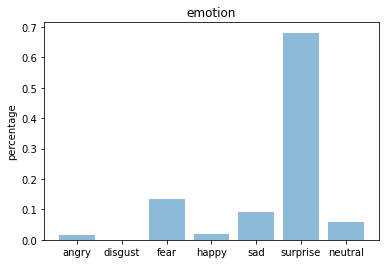

----------------------------------------------


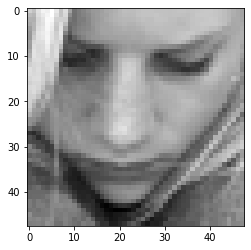

[1.9658541e-02 3.3124503e-05 3.1103722e-03 1.3060798e-01 8.1585848e-01
 2.8948835e-04 3.0441880e-02]


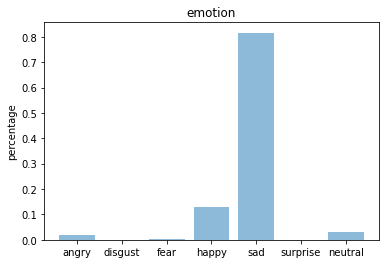

----------------------------------------------


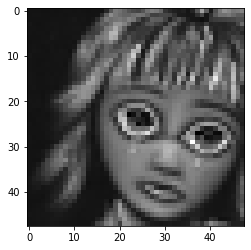

[8.4124385e-06 4.8068949e-12 5.8641797e-04 6.3099486e-07 9.9905103e-01
 8.9677066e-09 3.5346308e-04]


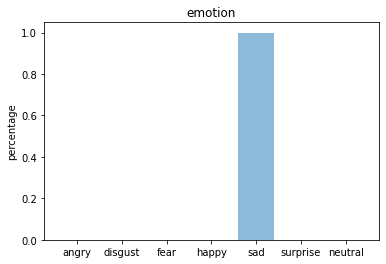

----------------------------------------------


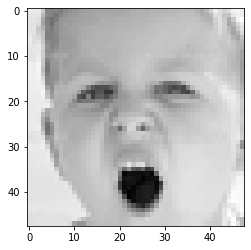

[6.5038097e-03 5.2999983e-08 9.9345195e-01 5.9475141e-08 3.4103305e-05
 6.1243617e-07 9.3242306e-06]


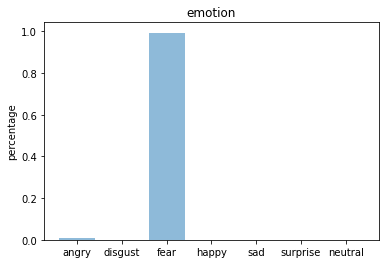

----------------------------------------------


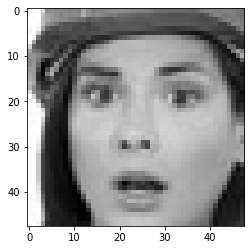

[4.5167848e-08 5.8776275e-13 2.7865349e-04 7.5817443e-11 1.7838957e-08
 9.9972123e-01 2.7996145e-11]


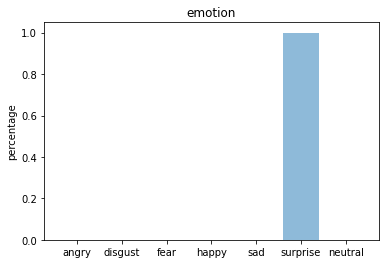

----------------------------------------------


In [6]:

monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

In [8]:
from keras.models import load_model
model = load_model('model25.h5')

In [9]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [18]:
import cv2
            
def facecrop(image):  
    facedata = "/content/drive/My Drive/Colab Notebooks/haarcascade_frontalface_alt.xml"
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('3_harcascade.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

    #cv2.imshow(image, img)


if __name__ == '__main__':
    facecrop('/content/photo.jpg')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


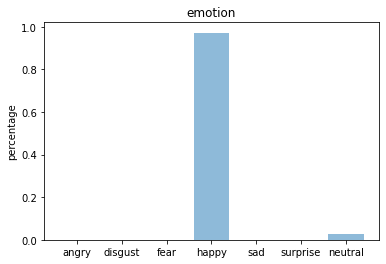

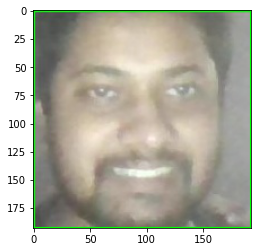

In [19]:
#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/3_harcascade.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

In [16]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
    return filename

In [17]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'